In [1]:
import tomotopy as tp
from gensim import corpora
from gensim.models import CoherenceModel
from tqdm import tqdm
import matplotlib.pyplot as plt
from nltk import tokenize
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from unidecode import unidecode


In [2]:
df = pd.read_csv('../datasets/Fundamentos_Religiosos_2022_Telegram.csv', delimiter=',', index_col=0)

In [3]:
len(df)

557586

In [4]:
df.head()

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text
date_message,,,,,,,,,,,,,,,,,,,
2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN,então é fato renato o áudio que eu ouvi no wha...
2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN,saiu no youtube do presidente a 8 horas atrás ...
2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN,é isso nossa parte já foi quase toda feita no ...
2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,gente achei eles em uma seita maçonárica
2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Wanda Silva,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,NaN


In [5]:
ids_para_remover = ['b73c0b674b28d87375d78dcae2f1a21f','62b3aa83e4df122e48cb1f97583e403f',
                    '893874da7344daaa00b8b5b3dc295b59','38737f3c7a07586c4efbfa39aa345705',
                    'da4cbbc1b7b1192ad83bcdae613ac2c3', 'bf66a467459264e0d33e4c8518a82827',
                    '46e009035e6150d656d0c194db88fb07','811541f6ce49347d1798e8dd2d3cbf83',
                    '1d2a0a63333d12ad188e9e6f7f2e0419','7c379613d4da713fe959d8c7ddc11ce2',
                    'debe17fd10d504076d2df8682f63bfc6','e9713ae04a02a810d6f33dd956f42794',
                    'd6c77928db26721ce46aca2d549780f0','8e53464d3b01eea3e39d07e51ecbb1b4',
                    'bacd40da04dd7d13f646993bdcf8e79d','2273d1167a6212812d95dc8fadbae78e',
                    'cd3bb1bdf75be7595e6373171a5c2225','add8c1ba533c5e5450d92c061a5ee7bf',
                    'e198f90df1995528531dd43db0c935ea', '06dc9ac55ed64caab2bd97e9ab717302',
                    'c0110feb539d212836605b66192722dd','f71912700ac5331415408ce229681359',
                    '2ee692357a9c948351c43a9540e859ae', '25b66278176dabe814dfc25a405a2470',
                    '08b21cb1e7de74ef5fe1085230075523']

In [6]:
# Filtrar o DataFrame para remover as linhas com esses IDs
df_filtrado = df[~df['id_member_anonymous'].isin(ids_para_remover)]
df_filtrado

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text
date_message,,,,,,,,,,,,,,,,,,,
2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN,então é fato renato o áudio que eu ouvi no wha...
2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN,saiu no youtube do presidente a 8 horas atrás ...
2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN,é isso nossa parte já foi quase toda feita no ...
2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,gente achei eles em uma seita maçonárica
2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Wanda Silva,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11 12:06:15,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,25e43b6a58b848c43ad5b5f9e979822a.jpg,url,https://terrabrasilnoticias.com/2022/11/bndes-...,True,True,False,5,2022-11-16 14:49:39.146502,0.1027,NaN,575796,Wanda Silva,Url,telegram,NaN,25e43b6a58b848c43ad5b5f9e979822a,bndes tem lucro de r 9 6 bilhões no terceiro t...
2022-11-11 12:09:08,NaN,5b10d7739171149be6d9961e3350c071,657949d03e4088f6b332e2686ccd3221.jpg,url,https://youtu.be/8g1Vz9_0xVk,True,True,False,5,2022-11-16 14:49:39.847434,0.0000,NaN,1286443,Wanda Silva,Url,telegram,NaN,657949d03e4088f6b332e2686ccd3221,youtu be
2022-11-11 12:09:47,NaN,1590a03f43b5ba4b6147a1c5e1dd357b,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,5,2022-11-16 14:49:39.922279,0.0000,NaN,13294,Wanda Silva,Imagem,telegram,NaN,a21848a61045380a6483866daed0ca0e,empresários demitam os petistas primeiro t me


In [7]:
# Removendo linhas com valores NaN na coluna 'pre_processed_text'
df_filtrado = df_filtrado.dropna(subset=['pre_processed_text'])

# Removendo trava_zap
df_filtrado = df_filtrado[df_filtrado['trava_zap'] == False]



#df_filtrado = df_filtrado[0:100]
len(df_filtrado)

443759

In [8]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):

    # Função para extrair e substituir o domínio da URL
    def substituir_dominios(texto):
        # Função para extrair e substituir o domínio da URL
        def extrair_dominio(url):
            # Remove o protocolo (http://, https://, etc.) e o "www." se presente
            dominio = re.sub(r'^https?://(?:www\.)?|www\.', '', url)
            # Remove o caminho e parâmetros da URL
            dominio = re.split(r'[/?#]', dominio)[0]
            # Retorna a parte principal do domínio (antes do primeiro ponto)
            return dominio.split('.')[0]

        # Substitui URLs por seus domínios principais
        return re.sub(r'https?://(?:www\.)?\S+|www\.\S+', lambda match: extrair_dominio(match.group(0)), texto)

    # Substituir domínios
    text = substituir_dominios(text)

    # Converte para minúsculas
    text = text.lower()

    # Remove acentos
    text = unidecode(text)

    #Remover Pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove URLs e menções
    #text = re.sub(r'http\S+|www\S+|https\S+|@\w+', '', text)

    # Substitui emojis repetidos por apenas um
    text = re.sub(r'([\U00010000-\U0010FFFF])\1+', r'\1', text)
    text = re.sub(r'([\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF])\1+', r'\1', text)


    # Remove espaços em branco extras (início ou final) e múltiplos espaços no meio do texto
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove pontuações e caracteres especiais
    #text = re.sub(r'[^\w\s]', '', text)

    # Ajusta risadas "kkk" ou mais para "kk"
    text = re.sub(r'k{2,}|K{2,}', 'kk', text)

    # Ajusta risadas "haha" ou mais para "haha"
    text = re.sub(r'(ha){2,}', 'haha', text, flags=re.IGNORECASE)

    # Ajusta risadas "kaka" ou mais para "kaka"
    text = re.sub(r'(ka){2,}', 'kaka', text, flags=re.IGNORECASE)

    # Remove as stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])


    return text


[nltk_data] Downloading package punkt to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:

df_geral = df_filtrado.copy()

# Aplicar o pré-processamento à coluna de texto
df_geral['text_processed'] = df_geral['pre_processed_text'].apply(preprocess_text)

### Calculando a diversidade dos tópicos
A diversidade de tópicos mede quantas palavras únicas existem entre os top-N termos de todos os tópicos. 

In [10]:
def topic_diversity(model, top_n=10):
    topic_words = []
    for k in range(model.k):  
        words = [word for word, _ in model.get_topic_words(k, top_n=top_n)]  
        topic_words.extend(words)
    unique_words = set(topic_words)
    return len(unique_words) / (top_n * model.k)


### IRBO 

IRBO avalia quanto os tópicos são distintos entre si, usando o Rank-Biased Overlap (RBO) invertido. Quanto maior o IRBO, mais diferentes são os tópicos

In [11]:
import rbo

def compute_irbo_ptm(model, top_n=10):
    topics = []
    for k in range(model.k):
        topic_terms = [word for word, _ in model.get_topic_words(k, top_n=top_n)]
        topics.append(topic_terms)

    n = len(topics)
    total_irbo = 0
    count = 0

    for i in range(n):
        for j in range(i + 1, n):
            rbo_score = rbo.RankingSimilarity(topics[i], topics[j]).rbo()
            total_irbo += (1 - rbo_score)  # IRBO = 1 - RBO
            count += 1

    return total_irbo / count if count > 0 else 0


In [12]:
# Processamento
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

In [13]:
def compute_coherence_ptm(texts, id2word, coherence, start=2, limit=30, step=2):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Treinando PTModel ({coherence})"):
        model = tp.PTModel(k=num_topics, seed=42)
        for doc in texts:
            model.add_doc(doc)
        model.train(100)
        model_list.append(model)

        # Coherence do gensim precisa de tópicos no formato: lista de listas de palavras
        topics = []
        for k in range(model.k):
            topic_words = [word for word, _ in model.get_topic_words(k, top_n=10)]
            topics.append(topic_words)

        coh_model = CoherenceModel(topics=topics, texts=texts, dictionary=id2word, coherence=coherence)
        coherence_score = coh_model.get_coherence()
        coherence_values.append(coherence_score)

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]

    return optimal_num_topics, model_list, coherence_values


In [14]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto]


## Modelando os Tópicos sem filtro 

In [15]:
texto_processado = df_geral['text_processed'].apply(processar_texto)

# Corpus e Dicionário (para CoherenceModel do gensim)
id2word = corpora.Dictionary(texto_processado)
corpus = [id2word.doc2bow(text) for text in texto_processado]
texts = texto_processado.tolist()

In [16]:
def calculate_ptm_coherence_for_metrics(texts, id2word, metrics, start=2, limit=30, step=2):
    results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_ptm(
            texts=texts,
            id2word=id2word,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

ptm_coherence_results = calculate_ptm_coherence_for_metrics(
    texts=texto_processado.tolist(),
    id2word=id2word,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)


Treinando PTModel (c_v):   0%|          | 0/14 [00:00<?, ?it/s]

C:\Users\Melissa Felipe\AppData\Local\Temp\ipykernel_8268\2436467606.py:10: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model.train(100)
Treinando PTModel (c_npmi): 100%|██████████| 14/14 [1:02:11<00:00, 266.53s/it]


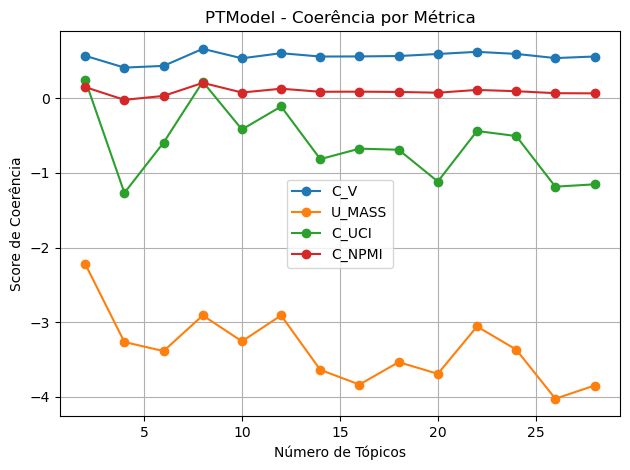


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.5702
Qtd. tópicos = 4 -> Coerência = 0.4118
Qtd. tópicos = 6 -> Coerência = 0.4352
Qtd. tópicos = 8 -> Coerência = 0.6636
Qtd. tópicos = 10 -> Coerência = 0.5366
Qtd. tópicos = 12 -> Coerência = 0.605
Qtd. tópicos = 14 -> Coerência = 0.5602
Qtd. tópicos = 16 -> Coerência = 0.5618
Qtd. tópicos = 18 -> Coerência = 0.5669
Qtd. tópicos = 20 -> Coerência = 0.5944
Qtd. tópicos = 22 -> Coerência = 0.6233
Qtd. tópicos = 24 -> Coerência = 0.5956
Qtd. tópicos = 26 -> Coerência = 0.5396
Qtd. tópicos = 28 -> Coerência = 0.5607
Melhor número de tópicos segundo C_V: 8

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -2.2194
Qtd. tópicos = 4 -> Coerência = -3.2648
Qtd. tópicos = 6 -> Coerência = -3.3856
Qtd. tópicos = 8 -> Coerência = -2.908
Qtd. tópicos = 10 -> Coerência = -3.2551
Qtd. tópicos = 12 -> Coerência = -2.9081
Qtd. tópicos = 14 -> Coerência = -3.6375
Qtd. tópicos = 16 -> Coerência = -3.8344
Qtd. tópi

In [17]:
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = ptm_coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("PTModel - Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resultados
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), ptm_coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {ptm_coherence_results[metric]['num_topics']}")


In [18]:
# Escolha da métrica
chosen_metric = 'c_npmi'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_c_npmi.csv', index=False)
df_topicos.head(10)

,Tópico,Palavras,Pesos
0,0,"13, 55, phone, batalhao, av, sp, militar, rs, ...","[0.1293513923883438, 0.02851739712059498, 0.02..."
1,1,"1, 0, lula, 3, 2, 10, 2022, t, alexeconomia, 00","[0.01887812837958336, 0.018121125176548958, 0...."
2,2,"user, voce, nao, aqui, pode, ganhar, dinheiro,...","[0.02885613963007927, 0.020096806809306145, 0...."
3,3,"brazil, tse, the, of, in, superior, following,...","[0.04581217095255852, 0.039610642939805984, 0...."
4,4,"to, the, this, i, and, you, is, of, vpn, with","[0.027774961665272713, 0.025675702840089798, 0..."
5,5,"user, telegram, intervencao, pra, militar, wel...","[0.02581762708723545, 0.021866006776690483, 0...."
6,6,"nao, bolsonaro, presidente, grupo, t, vamos, b...","[0.03087943233549595, 0.026979727670550346, 0...."
7,7,"nao, be, youtu, www, lula, ja, vai, youtube, t...","[0.023880697786808014, 0.015882201492786407, 0..."


In [19]:
div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")


Diversidade de Tópicos: 0.8875
IRBO médio entre tópicos: 0.9554


In [20]:
# Escolha da métrica
chosen_metric = 'c_v'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_c_v.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.8875
IRBO médio entre tópicos: 0.9554


,Tópico,Palavras,Pesos
0,0,"13, 55, phone, batalhao, av, sp, militar, rs, ...","[0.1293513923883438, 0.02851739712059498, 0.02..."
1,1,"1, 0, lula, 3, 2, 10, 2022, t, alexeconomia, 00","[0.01887812837958336, 0.018121125176548958, 0...."
2,2,"user, voce, nao, aqui, pode, ganhar, dinheiro,...","[0.02885613963007927, 0.020096806809306145, 0...."
3,3,"brazil, tse, the, of, in, superior, following,...","[0.04581217095255852, 0.039610642939805984, 0...."
4,4,"to, the, this, i, and, you, is, of, vpn, with","[0.027774961665272713, 0.025675702840089798, 0..."
5,5,"user, telegram, intervencao, pra, militar, wel...","[0.02581762708723545, 0.021866006776690483, 0...."
6,6,"nao, bolsonaro, presidente, grupo, t, vamos, b...","[0.03087943233549595, 0.026979727670550346, 0...."
7,7,"nao, be, youtu, www, lula, ja, vai, youtube, t...","[0.023880697786808014, 0.015882201492786407, 0..."


In [ ]:
# Escolha da métrica
chosen_metric = 'c_npmi'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_c_npmi.csv', index=False)
df_topicos.head(10)

,Tópico,Palavras,Pesos
0,0,"13, 55, phone, batalhao, av, sp, militar, rs, ...","[0.1293513923883438, 0.02851739712059498, 0.02..."
1,1,"1, 0, lula, 3, 2, 10, 2022, t, alexeconomia, 00","[0.01887812837958336, 0.018121125176548958, 0...."
2,2,"user, voce, nao, aqui, pode, ganhar, dinheiro,...","[0.02885613963007927, 0.020096806809306145, 0...."
3,3,"brazil, tse, the, of, in, superior, following,...","[0.04581217095255852, 0.039610642939805984, 0...."
4,4,"to, the, this, i, and, you, is, of, vpn, with","[0.027774961665272713, 0.025675702840089798, 0..."
5,5,"user, telegram, intervencao, pra, militar, wel...","[0.02581762708723545, 0.021866006776690483, 0...."
6,6,"nao, bolsonaro, presidente, grupo, t, vamos, b...","[0.03087943233549595, 0.026979727670550346, 0...."
7,7,"nao, be, youtu, www, lula, ja, vai, youtube, t...","[0.023880697786808014, 0.015882201492786407, 0..."


In [22]:
div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")


Diversidade de Tópicos: 0.8875
IRBO médio entre tópicos: 0.9554


In [ ]:
# Escolha da métrica
chosen_metric = 'u_mass'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_u_mass.csv', index=False)
df_topicos.head(10)

,Tópico,Palavras,Pesos
0,0,"the, this, of, in, brazil, tse, t, superior, t...","[0.014769508503377438, 0.012464332394301891, 0..."
1,1,"nao, bolsonaro, user, youtu, be, 13, lula, bra...","[0.0228878203779459, 0.00840346235781908, 0.00..."


In [24]:
div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")


Diversidade de Tópicos: 1.0
IRBO médio entre tópicos: 1.0


## Modelagem de tópicos com filtro religioso

In [25]:
palavras_religiosas = [
    "deus", "jesus", "misericordia", "davi",
    "salomao", "reino", "templo", "conservador",
    "pentecostal", "rcc", "renovacao", "carismatic",
    "paulo ricardo", "bernardo kuster", "herege", "ateu",
    "jerico", "heresia"
]


In [26]:
# Função para verificar se uma palavra está relacionada à religião
def relacionada_religiao(word):
    word_lower = word.lower()
    palavras_religiosas_lower = [palavra.lower() for palavra in palavras_religiosas]

    # Verificando se alguma palavra da lista de palavras religiosas está presente
    return any(palavra in word_lower for palavra in palavras_religiosas_lower)


df_religiao = df_geral[df_geral['text_processed'].apply(lambda x: relacionada_religiao(x))]



In [27]:
texto_processado_religiao = df_religiao['text_processed'].apply(processar_texto)

In [28]:
# Corpus e Dicionário (para CoherenceModel do gensim)
id2word_religiao = corpora.Dictionary(texto_processado_religiao)
corpus_religiao = [id2word.doc2bow(text) for text in texto_processado_religiao]
texts_religiao = texto_processado_religiao.tolist()

In [29]:
def calculate_ptm_coherence_for_metrics(texts_religiao, id2word_religiao, metrics, start=2, limit=30, step=2):
    results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_ptm(
            texts=texts_religiao,
            id2word=id2word_religiao,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

ptm_coherence_results = calculate_ptm_coherence_for_metrics(
    texts_religiao=texto_processado_religiao.tolist(),
    id2word_religiao=id2word_religiao,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)


Treinando PTModel (c_v):   0%|          | 0/14 [00:00<?, ?it/s]

C:\Users\Melissa Felipe\AppData\Local\Temp\ipykernel_8268\2436467606.py:10: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model.train(100)
Treinando PTModel (c_npmi): 100%|██████████| 14/14 [06:30<00:00, 27.89s/it]


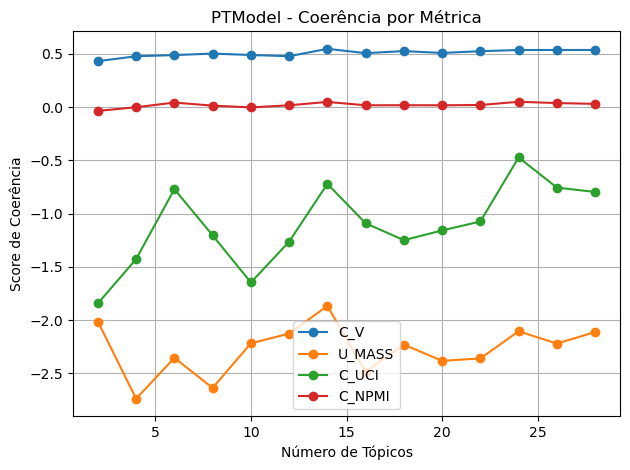


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.4323
Qtd. tópicos = 4 -> Coerência = 0.4787
Qtd. tópicos = 6 -> Coerência = 0.4895
Qtd. tópicos = 8 -> Coerência = 0.5035
Qtd. tópicos = 10 -> Coerência = 0.4902
Qtd. tópicos = 12 -> Coerência = 0.4787
Qtd. tópicos = 14 -> Coerência = 0.5482
Qtd. tópicos = 16 -> Coerência = 0.5078
Qtd. tópicos = 18 -> Coerência = 0.5268
Qtd. tópicos = 20 -> Coerência = 0.5095
Qtd. tópicos = 22 -> Coerência = 0.5262
Qtd. tópicos = 24 -> Coerência = 0.537
Qtd. tópicos = 26 -> Coerência = 0.5372
Qtd. tópicos = 28 -> Coerência = 0.5374
Melhor número de tópicos segundo C_V: 14

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -2.013
Qtd. tópicos = 4 -> Coerência = -2.7371
Qtd. tópicos = 6 -> Coerência = -2.3528
Qtd. tópicos = 8 -> Coerência = -2.6356
Qtd. tópicos = 10 -> Coerência = -2.2166
Qtd. tópicos = 12 -> Coerência = -2.1255
Qtd. tópicos = 14 -> Coerência = -1.8653
Qtd. tópicos = 16 -> Coerência = -2.4851
Qtd. tóp

In [30]:
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = ptm_coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("PTModel - Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resultados
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), ptm_coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {ptm_coherence_results[metric]['num_topics']}")


In [ ]:
# Escolha da métrica
chosen_metric = 'c_npmi'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_religioso_c_npmi.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.6833
IRBO médio entre tópicos: 0.9076


,Tópico,Palavras,Pesos
0,0,"nao, direito, pode, manifestacao, caso, todos,...","[0.08134813606739044, 0.016494449228048325, 0...."
1,1,"porque, entenderam, republica, tribunal, nao, ...","[0.021882589906454086, 0.019306829199194908, 0..."
2,2,"bolsonaro, nao, estados, brasil, df, gov, rio,...","[0.025292934849858284, 0.020388465374708176, 0..."
3,3,"1, 3, 13, 5, 2, 10, 4, t, 6, 11","[0.013234198093414307, 0.010871407575905323, 0..."
4,4,"n, 212, h, 0207, 001, w, pt, p, 00, london","[0.05463065952062607, 0.022303232923150063, 0...."
5,5,"nao, povo, bolsonaro, porque, sempre, sistema,...","[0.019381070509552956, 0.014690138399600983, 0..."
6,6,"grupo, liberdade, user, t, ola, patria, famili...","[0.06021682918071747, 0.05988229066133499, 0.0..."
7,7,"grupo, bolsonaro, nao, eleitores, 22, brasil, ...","[0.04272052273154259, 0.042175840586423874, 0...."
8,8,"nao, so, repassem, todos, 54, brasil, redes, s...","[0.08085133880376816, 0.021431976929306984, 0...."
9,9,"nao, presidente, povo, deus, ruas, intervencao...","[0.0355139821767807, 0.024668939411640167, 0.0..."


In [ ]:
# Escolha da métrica
chosen_metric = 'c_v'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_religioso_c_v.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.7571
IRBO médio entre tópicos: 0.9193


,Tópico,Palavras,Pesos
0,0,"deus, nao, senhor, jesus, existe, comigo, user...","[0.08385811001062393, 0.0645386278629303, 0.02..."
1,1,"turno, lula, nao, eleicoes, bolsonaro, segundo...","[0.01165853813290596, 0.010000403970479965, 0...."
2,2,"55, phone, grupos, 14, 31, 54, silva, 1, souza...","[0.24621842801570892, 0.18172016739845276, 0.0..."
3,3,"voce, nao, vai, porque, povo, agora, pode, poi...","[0.016196858137845993, 0.015551790595054626, 0..."
4,4,"pl, ptb, bolsonaro, coronel, deputado, tenente...","[0.05367376282811165, 0.023733092471957207, 0...."
5,5,"sao, contra, reino, sobre, disse, brasil, nao,...","[0.010764814913272858, 0.007078501861542463, 0..."
6,6,"nao, bolsonaro, grupo, brasil, todos, 22, elei...","[0.053759992122650146, 0.028888555243611336, 0..."
7,7,"lula, youtu, be, brasil, diz, pt, eterno, sobr...","[0.06130443140864372, 0.054490189999341965, 0...."
8,8,"nao, deus, bolsonaro, todos, presidente, vamos...","[0.036388203501701355, 0.03602566942572594, 0...."
9,9,"nao, bolsonaro, estados, povo, acima, brasil, ...","[0.024447394534945488, 0.014186717569828033, 0..."


In [ ]:
# Escolha da métrica
chosen_metric = 'u_mass'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_religioso_u_mass.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.7571
IRBO médio entre tópicos: 0.9193


,Tópico,Palavras,Pesos
0,0,"deus, nao, senhor, jesus, existe, comigo, user...","[0.08385811001062393, 0.0645386278629303, 0.02..."
1,1,"turno, lula, nao, eleicoes, bolsonaro, segundo...","[0.01165853813290596, 0.010000403970479965, 0...."
2,2,"55, phone, grupos, 14, 31, 54, silva, 1, souza...","[0.24621842801570892, 0.18172016739845276, 0.0..."
3,3,"voce, nao, vai, porque, povo, agora, pode, poi...","[0.016196858137845993, 0.015551790595054626, 0..."
4,4,"pl, ptb, bolsonaro, coronel, deputado, tenente...","[0.05367376282811165, 0.023733092471957207, 0...."
5,5,"sao, contra, reino, sobre, disse, brasil, nao,...","[0.010764814913272858, 0.007078501861542463, 0..."
6,6,"nao, bolsonaro, grupo, brasil, todos, 22, elei...","[0.053759992122650146, 0.028888555243611336, 0..."
7,7,"lula, youtu, be, brasil, diz, pt, eterno, sobr...","[0.06130443140864372, 0.054490189999341965, 0...."
8,8,"nao, deus, bolsonaro, todos, presidente, vamos...","[0.036388203501701355, 0.03602566942572594, 0...."
9,9,"nao, bolsonaro, estados, povo, acima, brasil, ...","[0.024447394534945488, 0.014186717569828033, 0..."


In [ ]:
# Escolha da métrica
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_religioso_c_uci.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.6833
IRBO médio entre tópicos: 0.9076


,Tópico,Palavras,Pesos
0,0,"nao, direito, pode, manifestacao, caso, todos,...","[0.08134813606739044, 0.016494449228048325, 0...."
1,1,"porque, entenderam, republica, tribunal, nao, ...","[0.021882589906454086, 0.019306829199194908, 0..."
2,2,"bolsonaro, nao, estados, brasil, df, gov, rio,...","[0.025292934849858284, 0.020388465374708176, 0..."
3,3,"1, 3, 13, 5, 2, 10, 4, t, 6, 11","[0.013234198093414307, 0.010871407575905323, 0..."
4,4,"n, 212, h, 0207, 001, w, pt, p, 00, london","[0.05463065952062607, 0.022303232923150063, 0...."
5,5,"nao, povo, bolsonaro, porque, sempre, sistema,...","[0.019381070509552956, 0.014690138399600983, 0..."
6,6,"grupo, liberdade, user, t, ola, patria, famili...","[0.06021682918071747, 0.05988229066133499, 0.0..."
7,7,"grupo, bolsonaro, nao, eleitores, 22, brasil, ...","[0.04272052273154259, 0.042175840586423874, 0...."
8,8,"nao, so, repassem, todos, 54, brasil, redes, s...","[0.08085133880376816, 0.021431976929306984, 0...."
9,9,"nao, presidente, povo, deus, ruas, intervencao...","[0.0355139821767807, 0.024668939411640167, 0.0..."


## Modelagem de tópicos com filtros religiosos e exclusão de político

In [35]:
palavras_politicas = [ "lula", "bolsonaro", "pt", "pl", "stf", "patria", "55", "22", "13", "senadores", "lulaladrao",
                       "urnas", "alexandre", "moraes", "comunismo", "eleicao", "eleicoes", "esquerda", "direita",
                         "presidente", "tse", "fraude", "voto", "turno", "ministro"]

In [36]:
def retirar_mensagens_com_palavras_politicas(word):
    word_lower = word.lower()
    palavras_politica_lower = [palavra.lower() for palavra in palavras_politicas]

    return any(palavra in word_lower for palavra in palavras_politica_lower)


df_politico = df_religiao[~df_religiao['text_processed'].apply(lambda x: retirar_mensagens_com_palavras_politicas(x))]



In [37]:
texto_processado_politico = df_politico['text_processed'].apply(processar_texto)

# Corpus e Dicionário (para CoherenceModel do gensim)
id2word_politico = corpora.Dictionary(texto_processado_politico)
corpus_politico = [id2word.doc2bow(text) for text in texto_processado_politico]
texts_politico = texto_processado_politico.tolist()

In [38]:
def calculate_ptm_coherence_for_metrics(texts_politico, id2word_politico, metrics, start=2, limit=30, step=2):
    results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_ptm(
            texts=texts_politico,
            id2word=id2word_politico,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

ptm_coherence_results = calculate_ptm_coherence_for_metrics(
    texts_politico=texto_processado_politico.tolist(),
    id2word_politico=id2word_politico,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)


Treinando PTModel (c_v):   0%|          | 0/14 [00:00<?, ?it/s]C:\Users\Melissa Felipe\AppData\Local\Temp\ipykernel_8268\2436467606.py:10: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model.train(100)
Treinando PTModel (c_npmi): 100%|██████████| 14/14 [03:30<00:00, 15.00s/it]


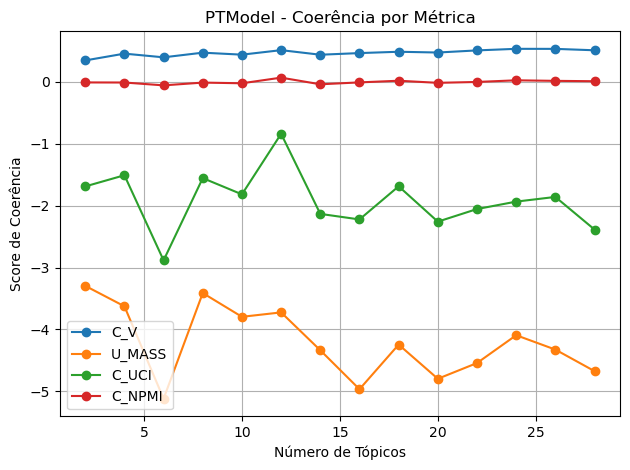


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.3483
Qtd. tópicos = 4 -> Coerência = 0.4581
Qtd. tópicos = 6 -> Coerência = 0.3983
Qtd. tópicos = 8 -> Coerência = 0.4736
Qtd. tópicos = 10 -> Coerência = 0.4414
Qtd. tópicos = 12 -> Coerência = 0.5144
Qtd. tópicos = 14 -> Coerência = 0.4403
Qtd. tópicos = 16 -> Coerência = 0.4669
Qtd. tópicos = 18 -> Coerência = 0.4884
Qtd. tópicos = 20 -> Coerência = 0.4761
Qtd. tópicos = 22 -> Coerência = 0.5103
Qtd. tópicos = 24 -> Coerência = 0.5357
Qtd. tópicos = 26 -> Coerência = 0.5351
Qtd. tópicos = 28 -> Coerência = 0.5122
Melhor número de tópicos segundo C_V: 24

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -3.295
Qtd. tópicos = 4 -> Coerência = -3.6251
Qtd. tópicos = 6 -> Coerência = -5.1191
Qtd. tópicos = 8 -> Coerência = -3.4111
Qtd. tópicos = 10 -> Coerência = -3.7952
Qtd. tópicos = 12 -> Coerência = -3.7238
Qtd. tópicos = 14 -> Coerência = -4.3358
Qtd. tópicos = 16 -> Coerência = -4.9655
Qtd. tó

In [39]:
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = ptm_coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("PTModel - Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resultados
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), ptm_coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {ptm_coherence_results[metric]['num_topics']}")


In [ ]:
# Escolha da métrica
chosen_metric = 'c_npmi'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_politico_c_npmi.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.8
IRBO médio entre tópicos: 0.8977


,Tópico,Palavras,Pesos
0,0,"user, telegram, managing, groups, tool, welcom...","[0.019833935424685478, 0.019629472866654396, 0..."
1,1,"deus, estao, www, dias, ai, grupo, canal, nada...","[0.02023882418870926, 0.01770070567727089, 0.0..."
2,2,"fazer, vamos, verdade, fe, sao, deus, sera, va...","[0.014616155996918678, 0.013348665088415146, 0..."
3,3,"t, reino, unido, paz, joao, y, alexeconomia, d...","[0.091862753033638, 0.03569132462143898, 0.022..."
4,4,"todos, deus, bom, tudo, acima, dia, brasil, be...","[0.03847257047891617, 0.022886987775564194, 0...."
5,5,"deus, nao, vai, povo, so, pra, gente, tudo, ag...","[0.10813234001398087, 0.06301983445882797, 0.0..."
6,6,"deus, voce, abencoe, user, obrigado, mim, empr...","[0.053502343595027924, 0.04524260014295578, 0...."
7,7,"user, voce, dinheiro, aqui, ganhar, pode, come...","[0.030738219618797302, 0.03001781739294529, 0...."
8,8,"nao, sao, pois, contra, mundo, disse, fe, espi...","[0.020214632153511047, 0.01373340468853712, 0...."
9,9,"senhor, deus, jesus, nao, nome, cristo, sempre...","[0.03900440037250519, 0.03795289993286133, 0.0..."


In [ ]:
# Escolha da métrica
chosen_metric = 'c_v'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_politico_c_v.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.7
IRBO médio entre tópicos: 0.9353


,Tópico,Palavras,Pesos
0,0,"reino, unido, general, comando, t, militar, al...","[0.040285248309373856, 0.0315445214509964, 0.0..."
1,1,"nao, porque, tambem, jesus, coisas, sao, miser...","[0.05837773531675339, 0.021644677966833115, 0...."
2,2,"nao, hoje, dia, vida, voce, vem, tudo, novo, d...","[0.06302250921726227, 0.05447724461555481, 0.0..."
3,3,"yhvh, reino, nomes, 10, anos, 1, sao, rei, ben...","[0.011946837417781353, 0.0101902075111866, 0.0..."
4,4,"senhor, deus, nao, pai, pois, cristo, santo, j...","[0.05099174380302429, 0.04103294759988785, 0.0..."
5,5,"user, telegram, welcome, professional, tool, m...","[0.04230277240276337, 0.03989934176206589, 0.0..."
6,6,"deus, agora, brasil, jesus, vamos, youtu, be, ...","[0.0921129360795021, 0.03775164857506752, 0.03..."
7,7,"grupo, adeus, youtube, link, fatos, especuland...","[0.028030943125486374, 0.017809094861149788, 0..."
8,8,"deus, nao, ja, voce, vamos, pessoas, bem, todo...","[0.07997475564479828, 0.05285080894827843, 0.0..."
9,9,"aqui, user, pode, dinheiro, anos, ganhar, come...","[0.0629030093550682, 0.052571363747119904, 0.0..."


In [ ]:
# Escolha da métrica
chosen_metric = 'u_mass'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_politico_u_mass.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.95
IRBO médio entre tópicos: 0.9354


,Tópico,Palavras,Pesos
0,0,"jesus, todos, senhor, t, so, deus, brasil, tud...","[0.012007380835711956, 0.01062889862805605, 0...."
1,1,"deus, nao, comigo, existe, repitam, voce, user...","[0.09938586503267288, 0.08031461387872696, 0.0..."


In [ ]:
# Escolha da métrica
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_telegram_politico_c_uci.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.8
IRBO médio entre tópicos: 0.8977


,Tópico,Palavras,Pesos
0,0,"user, telegram, managing, groups, tool, welcom...","[0.019833935424685478, 0.019629472866654396, 0..."
1,1,"deus, estao, www, dias, ai, grupo, canal, nada...","[0.02023882418870926, 0.01770070567727089, 0.0..."
2,2,"fazer, vamos, verdade, fe, sao, deus, sera, va...","[0.014616155996918678, 0.013348665088415146, 0..."
3,3,"t, reino, unido, paz, joao, y, alexeconomia, d...","[0.091862753033638, 0.03569132462143898, 0.022..."
4,4,"todos, deus, bom, tudo, acima, dia, brasil, be...","[0.03847257047891617, 0.022886987775564194, 0...."
5,5,"deus, nao, vai, povo, so, pra, gente, tudo, ag...","[0.10813234001398087, 0.06301983445882797, 0.0..."
6,6,"deus, voce, abencoe, user, obrigado, mim, empr...","[0.053502343595027924, 0.04524260014295578, 0...."
7,7,"user, voce, dinheiro, aqui, ganhar, pode, come...","[0.030738219618797302, 0.03001781739294529, 0...."
8,8,"nao, sao, pois, contra, mundo, disse, fe, espi...","[0.020214632153511047, 0.01373340468853712, 0...."
9,9,"senhor, deus, jesus, nao, nome, cristo, sempre...","[0.03900440037250519, 0.03795289993286133, 0.0..."
